In [1]:
# 모델 만드는  메인 파일

# TODO
# 영상
# -> 수지신호 특징점 프레임(들) / 비수지신호 특징점 프레임(들)
# -> 수지신호 벡터 / 비수지신호 벡터
# -> 둘이 합쳐진 벡터

# -> 원본 단어를 해석한 벡터와 비교해서 학습


# Word2Vec은 원본 단어 -> 학습용 벡터
# 학습된 모델에서 나온 벡터 -> 단어로 바꾸는데도 ㄱㄱ

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

def draw_img(x) :
  plt.figure()
  plt.imshow(x)
  plt.show()

(cx_train, cy_train), (cx_test, cy_test) = tf.keras.datasets.cifar100.load_data(label_mode="fine")
cx_train, cx_test = cx_train/255.0, cx_test/255.0
classes = [
#    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
#    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
#    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
#    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
#    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
#    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
#    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
#    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
#    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
#    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
#    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
#    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
#    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
#    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
#    'worm'
# 구글 번역기로 위 내용을 한국어로 번역
    '사과', '수족관 물고기', '아기', '곰', '비버', '침대', '꿀벌', '딱정벌레',
    '자전거', '병', '그릇', '소년', '다리', '버스', '나비', '낙타',
    '캔', '성', '애벌레', '소', '의자', '침팬지', '시계',
    '구름','바퀴벌레','소파','게','악어','컵','공룡',
    '돌고래', '코끼리', '가자미','숲','여우','소녀','햄스터',
    '집', '캥거루', '키보드', '램프', '잔디깎기', '표범', '사자',
    '도마뱀', '랍스터', '사람', '매이플트리', '오토바이', '산', '마우스',
    '버섯', '오크트리', '오렌지', '난초', '수달', '팜트리', '배',
    '픽업트럭', '소나무', '평지', '접시', '양귀비', '호저',
    '주머니쥐', '토끼', '너구리', '레이', '도로', '로켓', '장미',
    '바다', '인감', '상어', '뒤쥐', '스컹크', '고층건물', '달팽이', '뱀',
    '거미', '다람쥐', '전차', '해바라기', '단고추', '테이블',
    '탱크', '전화', '텔레비전', '호랑이', '트랙터', '기차', '송어',
    '튤립', '거북이', '옷장', '고래', '버드나무', '늑대', '여자',
    '벌레'
]

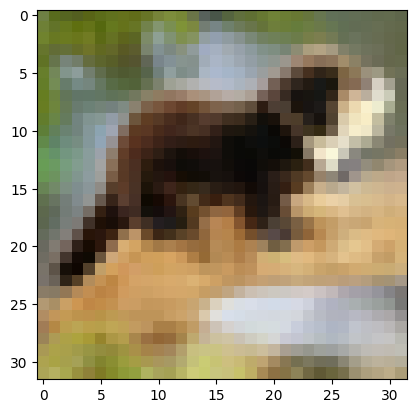

수달


In [3]:
idx = np.random.randint(0,9999)
draw_img(cx_test[idx])
print(classes[cy_test[idx][0]])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                        

2022-11-03 16:49:59.967955: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-03 16:49:59.988414: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-03 16:49:59.988507: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-03 16:49:59.988990: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

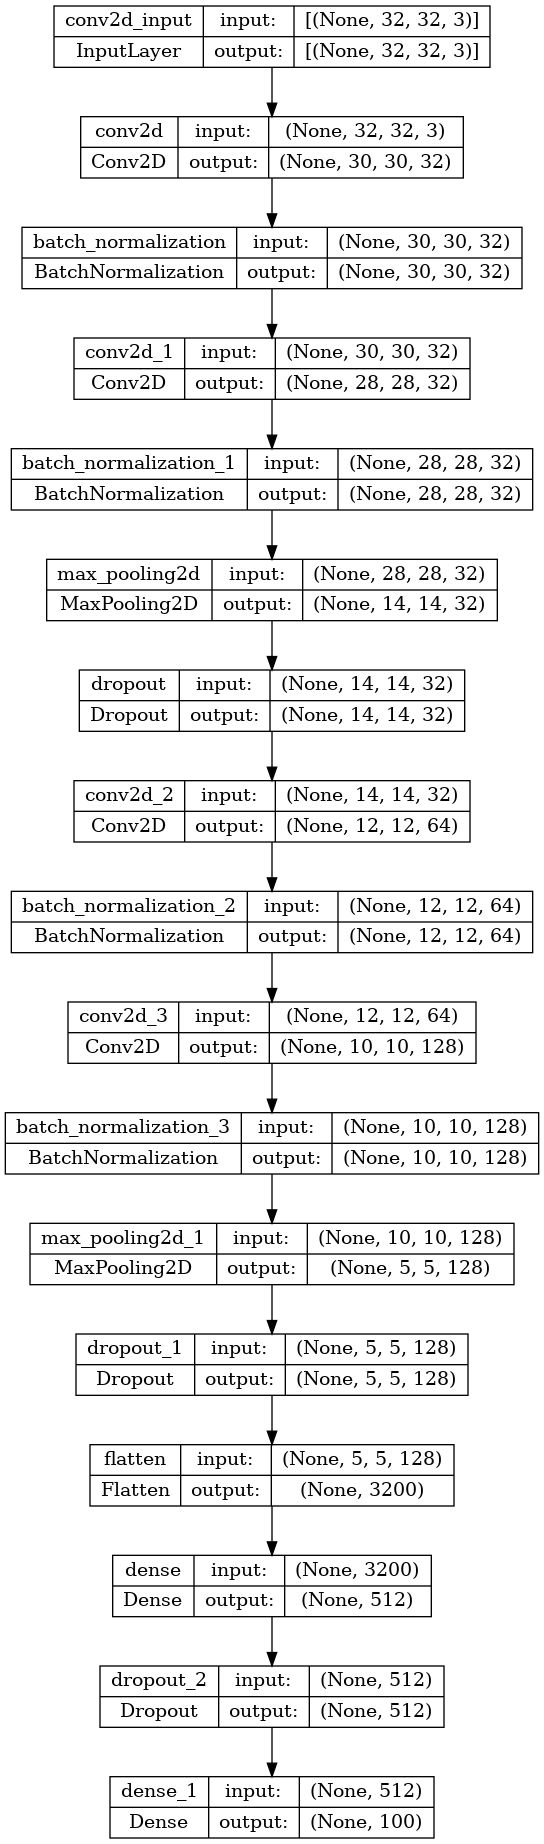

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32,32,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), kernel_initializer='he_uniform', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), kernel_initializer='he_uniform', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), kernel_initializer='he_uniform', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(100, activation='softmax'))
opt = tf.keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()
tf.keras.utils.plot_model(model, to_file="/home/q/RnE/model.png", show_shapes=True) # https://www.tensorflow.org/tutorials/images/segmentation?hl=ko

In [5]:
# history = model.fit(cx_train, cy_train, epochs=5)
# for tensorboard
history = model.fit(cx_train, cy_train, batch_size=4096, epochs=100, validation_data=(cx_test, cy_test))
# 모델 저장, 훈련 후 다운로드를 받아두어야 나중에 업로드하여 재사용 가능함.
model.save("/home/q/RnE/cifar100.h5")

Epoch 1/100


2022-11-03 16:50:03.736228: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500
2022-11-03 16:50:04.043142: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-03 16:50:04.560830: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


13/13 [==============================] - 5s 180ms/step - loss: 7.6029 - accuracy: 0.0154 - val_loss: 4.6055 - val_accuracy: 0.0100
Epoch 2/100
13/13 [==============================] - 1s 87ms/step - loss: 4.5817 - accuracy: 0.0166 - val_loss: 4.6057 - val_accuracy: 0.0100
Epoch 3/100
13/13 [==============================] - 1s 87ms/step - loss: 4.5210 - accuracy: 0.0233 - val_loss: 4.6064 - val_accuracy: 0.0102
Epoch 4/100
13/13 [==============================] - 1s 87ms/step - loss: 4.4648 - accuracy: 0.0285 - val_loss: 4.8109 - val_accuracy: 0.0152
Epoch 5/100
13/13 [==============================] - 1s 87ms/step - loss: 4.4042 - accuracy: 0.0345 - val_loss: 4.6140 - val_accuracy: 0.0185
Epoch 6/100
13/13 [==============================] - 1s 87ms/step - loss: 4.3339 - accuracy: 0.0417 - val_loss: 4.5084 - val_accuracy: 0.0268
Epoch 7/100
13/13 [==============================] - 1s 87ms/step - loss: 4.2763 - accuracy: 0.0466 - val_loss: 4.3440 - val_accuracy: 0.0335
Epoch 8/100
13/13

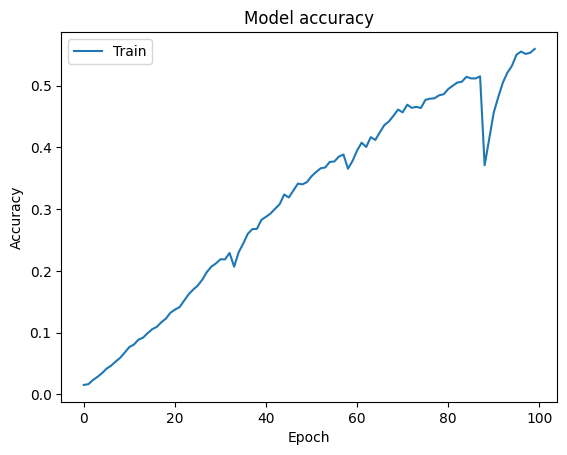

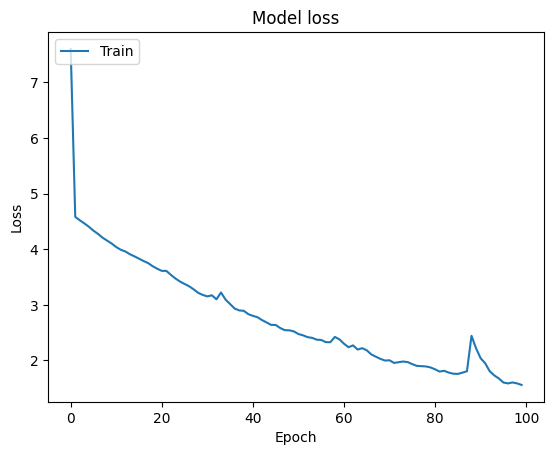

In [6]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [7]:
test_loss, test_acc = model.evaluate(cx_test, cy_test)
print(test_acc, test_loss)

313/313 [==============================] - 0s 1ms/step - loss: 2.1188 - accuracy: 0.4669
0.4668999910354614 2.118835210800171


In [8]:
prediction = model.predict(cx_test)

313/313 [==============================] - 0s 1ms/step


8135 92 튤립 튤립


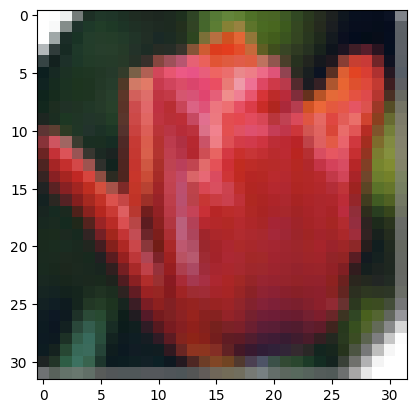

In [9]:
import random
image_number = random.randint(0,9999)
answer = np.argmax(prediction[image_number])
print(image_number, answer, classes[answer], classes[cy_test[image_number][0]])
draw_img(cx_test[image_number])

In [11]:
new_model = keras.models.load_model('/home/q/RnE/cifar100.h5')
new_model.summary()
loss, acc = new_model.evaluate(cx_train,  cy_train, verbose=2)
print("복원된 모델의 훈련데이터 정확도: {:5.2f}%".format(100*acc))
loss, acc = new_model.evaluate(cx_test,  cy_test, verbose=2)
print("복원된 모델의 테스트데이터 정확도: {:5.2f}%".format(100*acc))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                        